In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import json 
import os



mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.autolayout'] = False
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['lines.markersize'] = 5
mpl.rcParams['lines.markeredgewidth'] = 1.2
mpl.rcParams['errorbar.capsize'] = 5
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['xtick.minor.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 6
mpl.rcParams['ytick.minor.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 6
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams['font.family'] = 'sans-serif'
# mpl.rcParams["text.usetex"] = True



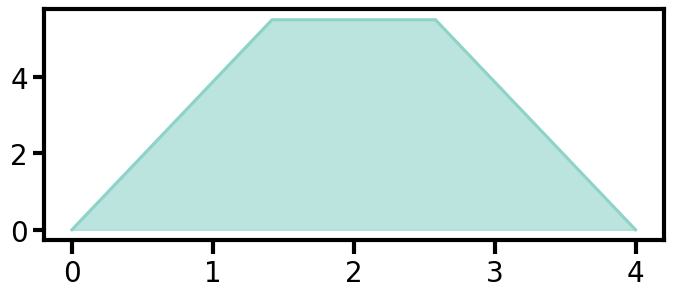

In [2]:
with open("./Data/opt_schedule_QAA.json", "r") as file:
    schedule = json.load(file)

omegas = schedule["omega_list"]
deltas = schedule["delta_list"]
times = schedule["times"]
phis = len(omegas) * [0]
num_pulses = len(schedule["omega_list"])
fig, ax = plt.subplots(figsize=(8,3))
colors = plt.get_cmap("Set3")
ax.plot(1e6*np.array(times), 1e-6*np.array(omegas), color= colors(0))
ax.fill_between(1e6*np.array(times), phis, 1e-6*np.array(omegas), color= colors(0), alpha=0.6)
fig.savefig("./Figures/omegas_QAA.pdf", bbox_inches="tight", transparent=True)

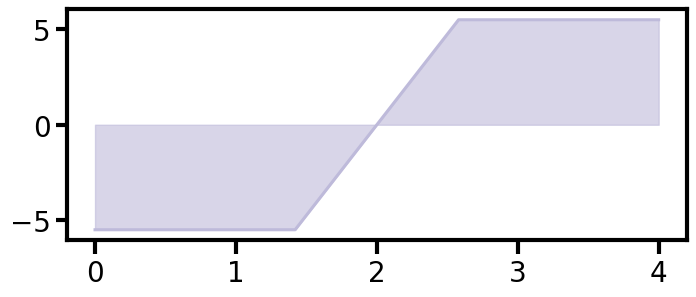

In [4]:
with open("./Data/opt_schedule_QAA.json", "r") as file:
    schedule = json.load(file)

omegas = schedule["omega_list"]
deltas = schedule["delta_list"]
times = schedule["times"]
phis = len(omegas) * [0]
num_pulses = len(schedule["omega_list"])
fig, ax = plt.subplots(figsize=(8,3))
colors = plt.get_cmap("Set3")
ax.plot(1e6*np.array(times), 1e-6*np.array(deltas), color= colors(2))
ax.fill_between(1e6*np.array(times), phis, 1e-6*np.array(deltas), color= colors(2), alpha=0.6)
fig.savefig("./Figures/deltas_QAA.pdf", bbox_inches="tight", transparent=True)

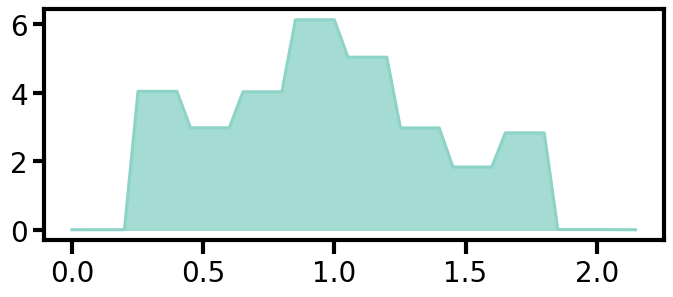

In [2]:
with open("./Data/opt_schedule.json", "r") as file:
    schedule = json.load(file)

omegas = [0,0] + [i for i in schedule["omega_list"] for _ in range(2)] + [0]
deltas = [0,0] + [i for i in schedule["delta_list"] for _ in range(2)] + [0]
phis = len(omegas) * [0]
num_pulses = len(schedule["omega_list"])

t_tot = 2.0e-6
t_q = 0.052e-6
t_p = t_tot/num_pulses-t_q
t_delay = 0 #round(1.95e-6,9)
times = [0 , t_delay]
t_i = t_delay
for i in range(0, num_pulses):
    t_i += round(t_q,9)
    times.append(t_i)
    t_i += round(t_p,9)
    times.append(t_i)
times.append(round(t_i+t_p,9))

fig, ax = plt.subplots(figsize=(8,3))
colors = plt.get_cmap("Set3")
ax.plot(1e6*np.array(times), 1e-6*np.array(omegas), color= colors(0))
ax.fill_between(1e6*np.array(times), phis, 1e-6*np.array(omegas), color= colors(0), alpha=0.8)
fig.savefig("./Figures/omegas.pdf", bbox_inches="tight", transparent=True)

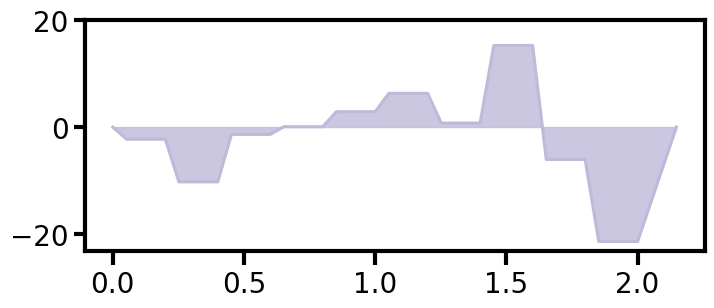

In [5]:
fig, ax = plt.subplots(figsize=(8,3))
colors = plt.get_cmap("Set3")
ax.plot(1e6*np.array(times), 1e-6*np.array(deltas), color= colors(2))
ax.fill_between(1e6*np.array(times), phis, 1e-6*np.array(deltas), color= colors(2), alpha=0.8)
ax.set_yticks([-20,0,20])
fig.savefig("./Figures/deltas.pdf", bbox_inches="tight", transparent=True)

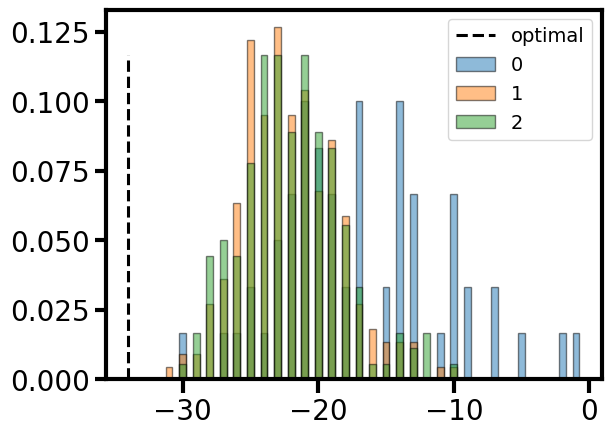

In [4]:
nq = 100
backend_name = "braket_emulator"
backend_name = "quera_aquila"
extra = "_2"

time = "t_2e-06"
fig, ax = plt.subplots()
for nn, extra in enumerate(["1", "2", "3"]):
    with open(f"./Data/{backend_name}/QAA/{extra}/{nq}_{time}.json", "r") as file:
        result = json.load(file)
    keys = [int(i) for i in result["cost"].keys()]
    res_i = [result["cost"][str(i)]/sum(result["cost"].values()) for i in keys]
    ax.bar(keys, res_i, label=nn, edgecolor="black",width=0.5, alpha=0.5)
ax.vlines(result["min_cost"], 0, max(res_i), color="black", linestyle="--", label="optimal")
ax.legend()
os.makedirs(f"./Figures/{backend_name}/", exist_ok=True)
# fig.savefig(f"./Figures/{backend_name}/{nq}.pdf", bbox_inches="tight", transparent=True)

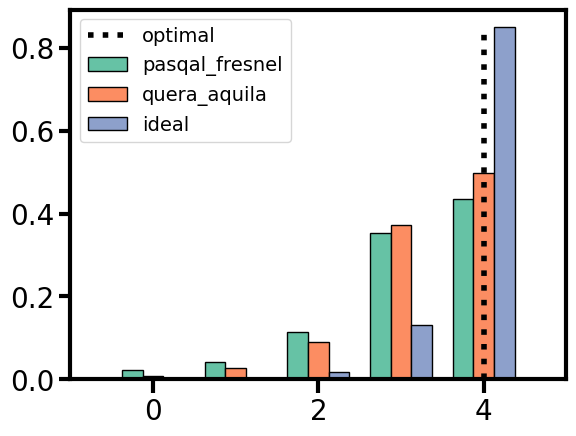

In [28]:
nq = 13
backends = ["pasqal_fresnel","quera_aquila","braket_emulator"]
label = {"pasqal_fresnel":"pasqal_fresnel","quera_aquila":"quera_aquila","braket_emulator":"ideal"}
colors= plt.get_cmap("Set2")
time = "t_4e-06"
results = {}
case = 1
for backend_name in backends:
    with open(f"./Data/{backend_name}/QAA/{case}/{nq}_{time}.json", "r") as file:
        results[backend_name] = json.load(file)
width = 0.25
fig, ax = plt.subplots()
for nn, backend_name in enumerate(backends):
    keys = np.array([-int(i) for i in results[backend_name]["cost"].keys()])
    res_i = [results[backend_name]["cost"][str(-i)]/sum(results[backend_name]["cost"].values())  for i in keys]
    ax.bar(keys+width*nn-width*(len(backends)-1)/2, res_i, label=label[backend_name], edgecolor="black",width=width, color=colors(nn))
ax.vlines(-results[backend_name]["min_cost"], 0, max(res_i), color="black", linestyle=":", label="optimal", linewidth=4)
ax.legend()
ax.set_xlim(-1,5)
ax.set_xticks([0,2,4])
os.makedirs(f"./Figures/{backend_name}/", exist_ok=True)
fig.savefig(f"./Figures/{nq}_comparison_QPUs.pdf", bbox_inches="tight", transparent=True)

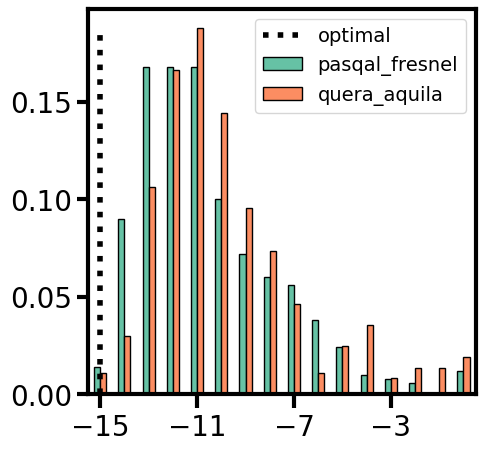

In [30]:
nq = 41
backends = ["pasqal_fresnel","quera_aquila"]
colors= plt.get_cmap("Set2")
time = "t_4e-06"
results = {}
case = 1
for backend_name in backends:
    with open(f"./Data/{backend_name}/QAA/{case}/{nq}_{time}.json", "r") as file:
        results[backend_name] = json.load(file)
width = 0.25
fig, ax = plt.subplots(figsize=(5,5))
for nn, backend_name in enumerate(backends):
    keys = np.array([int(i) for i in results[backend_name]["cost"].keys()])
    res_i = [results[backend_name]["cost"][str(i)]/sum(results[backend_name]["cost"].values())  for i in keys]
    ax.bar(keys+width*nn-width*(len(backends)-1)/2, res_i, label=backend_name, edgecolor="black",width=width, color=colors(nn))
ax.vlines(results[backend_name]["min_cost"], 0, max(res_i), color="black", linestyle=":", label="optimal", linewidth=4)
ax.legend()
ax.set_xlim(results[backend_name]["min_cost"]-0.5, 0.5)
ax.set_xticks(range(results[backend_name]["min_cost"], 0+1,4))
os.makedirs(f"./Figures/{backend_name}/", exist_ok=True)
# fig.savefig(f"./Figures/{nq}_comparison_QPUs.pdf", bbox_inches="tight", transparent=True)

In [10]:
nq = 13
backends = ["pulser_emulator","quera_aquila","pulser_emulator_noisy"]
colors= plt.get_cmap("Set2")
results = {}
for backend_name in backends:
    with open(f"./Data/{backend_name}/QAOA/1/{nq}.json", "r") as file:
        results[backend_name] = json.load(file)
width = 0.25
fig, ax = plt.subplots()
for nn, backend_name in enumerate(backends):
    keys = np.array([int(i) for i in results[backend_name]["cost"].keys()])
    res_i = [results[backend_name]["cost"][str(i)]/sum(results[backend_name]["cost"].values())  for i in keys]
    ax.bar(keys+width*nn-width*(len(backends)-1)/2, res_i, label=backend_name, edgecolor="black",width=width, color=colors(nn))
ax.vlines(results[backend_name]["min_cost"], 0, max(res_i), color="black", linestyle=":", label="optimal", linewidth=4)
ax.legend()
os.makedirs(f"./Figures/{backend_name}/", exist_ok=True)
# fig.savefig(f"./Figures/{nq}_comparison_QPUs.pdf", bbox_inches="tight", transparent=True)

NameError: name 'plt' is not defined

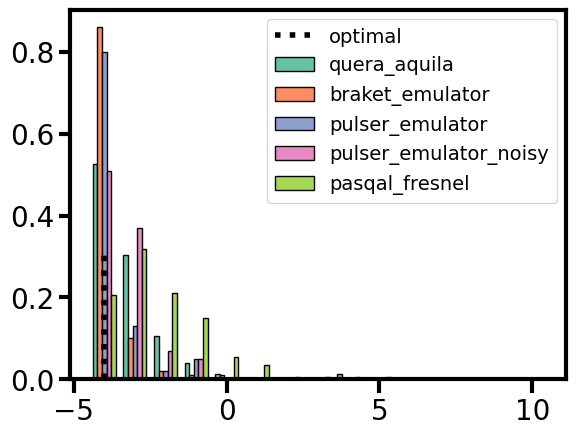

In [28]:
nq = 13
backends = ["quera_aquila","braket_emulator", "pulser_emulator", "pulser_emulator_noisy","pasqal_fresnel"]
colors= plt.get_cmap("Set2")
results = {}
for backend_name in backends:
    with open(f"./Data/{backend_name}/{nq}.json", "r") as file:
        results[backend_name] = json.load(file)
width = 0.15
fig, ax = plt.subplots()
for nn, backend_name in enumerate(backends):
    keys = np.array([int(i) for i in results[backend_name]["cost"].keys()])
    res_i = [results[backend_name]["cost"][str(i)]/sum(results[backend_name]["cost"].values())  for i in keys]
    ax.bar(keys+width*nn-width*(len(backends)-1)/2, res_i, label=backend_name, edgecolor="black",width=width, color=colors(nn))
ax.vlines(results[backend_name]["min_cost"], 0, max(res_i), color="black", linestyle=":", label="optimal", linewidth=4)
ax.legend()
os.makedirs(f"./Figures/{backend_name}/", exist_ok=True)
fig.savefig(f"./Figures/{nq}_comparison.pdf", bbox_inches="tight", transparent=True)

/Users/alejomonbar/Documents/GitHub/Benchmarking-neutral-atom-QPUs/.conda/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


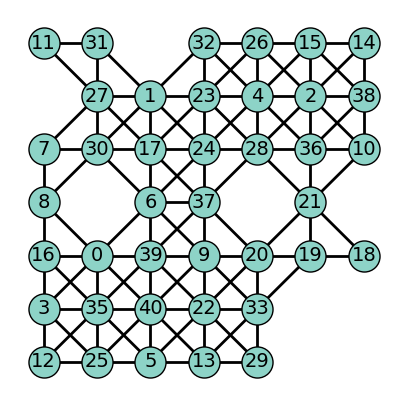

In [6]:
nq = 41
colors= plt.get_cmap("Set3")
backend_name = "braket_emulator"
with open(f"./Data/problems/{nq}.json", "r") as file:
    problem = json.load(file)
fig, ax = plt.subplots(figsize=(5,5))
G = nx.Graph()
G.add_edges_from(problem["edges"])
nx.draw(G, pos=problem["pos"], with_labels=True, node_size=500, node_color=colors(0), font_size=14, edgecolors="black", ax=ax, width=2)
fig.savefig(f"./Figures/Graphs/{nq}.pdf", bbox_inches="tight", transparent=True)

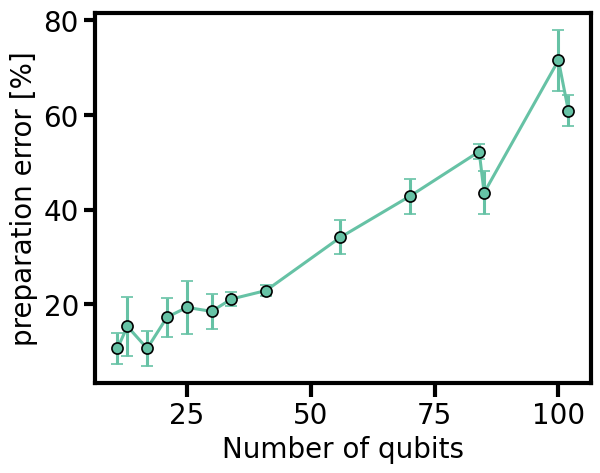

In [92]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
nqs = [11,13,17,21,25,30,34,41,56,70,84,85,100,102]
total_defects = []
for extra in ["", "_1", "_2"]:
    defects = []
    for nq in nqs:
        with open(f"./Data/{backend_name}/{nq}{extra}.json", "r") as file:
            results = json.load(file)
        if "shots" not in results:
            results["shots"] = 100 if nq <= 30 else 200
        defects.append(results["defects"]/results["shots"])
    total_defects.append(defects)
total_defects = 100*np.array(total_defects).T
ax.errorbar(nqs, total_defects.mean(axis=1), total_defects.std(axis=1), capsize=4, marker="o", label=backend_name, color=colors(0), markeredgecolor="black", markersize=8)
ax.set_xlabel("Number of qubits")
ax.set_ylabel("preparation error [%]")
fig.savefig(f"./Figures/{backend_name}/defects.pdf", bbox_inches="tight", transparent=True)

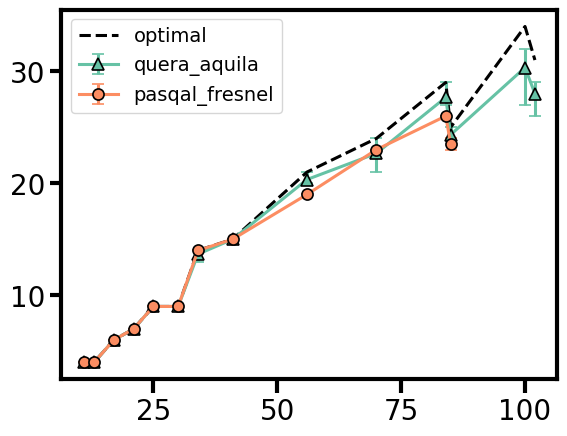

In [24]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
# backend_name = "pasqal_fresnel"
colors= plt.get_cmap("Set2")
method = "QAA"
case = 1
time = "t_4e-06"
mitig = False
for ii, backend_name in enumerate(["quera_aquila", "pasqal_fresnel"]):
    nqs = {"quera_aquila":[11,13,17,21,25,30,34,41,56,70,84,85,100,102], "pasqal_fresnel":[11,13,17,21,25,30,34,41,56,70,84,85]}[backend_name]
    # nqs = [11,13,17,21,25,30,34,41]
    total_cost = []
    opt_cost = []
    for case in [1,2,3] if backend_name == "quera_aquila" else [2,3]:
        cost = []
        for nq in nqs:
            with open(f"./Data/{backend_name}/{method}/{case}/{nq}_{time}.json", "r") as file:
                results = json.load(file)
            cost.append(min([int(i) for i in results[f"greedy_cost" if mitig == True else "cost"].keys()]))
            if case == 2:
                opt_cost.append(results["min_cost"])
        total_cost.append(cost)
        
    total_cost = -1*np.array(total_cost).T
    ax.errorbar(nqs, total_cost.mean(axis=1), [-1*(total_cost.min(axis=1)-total_cost.mean(axis=1)),-1*(total_cost.mean(axis=1)- total_cost.max(axis=1))], capsize=4, marker="o" if backend_name=="pasqal_fresnel" else "^", label=backend_name, color=colors(ii), markeredgecolor="black", markersize=8)
    if backend_name == "quera_aquila":
        ax.plot(nqs, -np.array(opt_cost), color="black", linestyle="--", label="optimal")
# ax.set_xlabel("Number of qubits")
# ax.set_ylabel("cost")
ax.legend()
fig.savefig(f"./Figures/cost_comparison.pdf", bbox_inches="tight", transparent=True)

KeyError: 'probability'

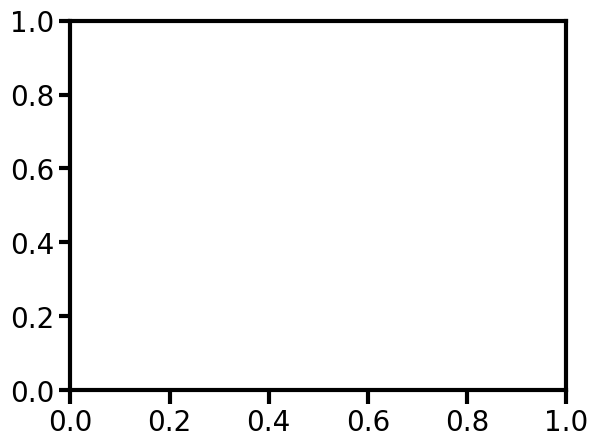

In [4]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
# backend_name = "pasqal_fresnel"
colors= plt.get_cmap("Set2")
method = "QAA"
case = 1
times = ["t_2e-06","t_4e-06"]
nq = 30
mitig = False
for ii, backend_name in enumerate(["quera_aquila", "pasqal_fresnel"]):
    nqs = {"quera_aquila":[11,13,17,21,25,30,34,41,56,70,84,85,100,102], "pasqal_fresnel":[11,13,17,21,25,30,34,41]}[backend_name]
    # nqs = [11,13,17,21,25,30,34,41]
    total_cost = []
    opt_cost = []
    for case in [1,2,3]:
        cost = []
        for time in times:
            with open(f"./Data/{backend_name}/{method}/{case}/{nq}_{time}.json", "r") as file:
                results = json.load(file)
            cost.append(np.mean([int(i) for i in results[f"greedy_cost" if mitig == True else "probability"].keys()]))
            if case == 1:
                opt_cost.append(results["min_cost"])
        total_cost.append(cost)
        
    total_cost = np.array(total_cost).T
    ax.errorbar(times, total_cost.mean(axis=1), [-1*(total_cost.min(axis=1)-total_cost.mean(axis=1)),-1*(total_cost.mean(axis=1)- total_cost.max(axis=1))], capsize=4, marker="o" if backend_name=="pasqal_fresnel" else "^", label=backend_name, color=colors(ii), markeredgecolor="black", markersize=8)
    if backend_name == "quera_aquila":
        ax.plot(times, opt_cost, color="black", linestyle="--", label="optimal")
ax.set_xlabel("Number of qubits")
ax.set_ylabel("cost")
ax.legend()
# fig.savefig(f"./Figures/cost_comparison.pdf", bbox_inches="tight", transparent=True)

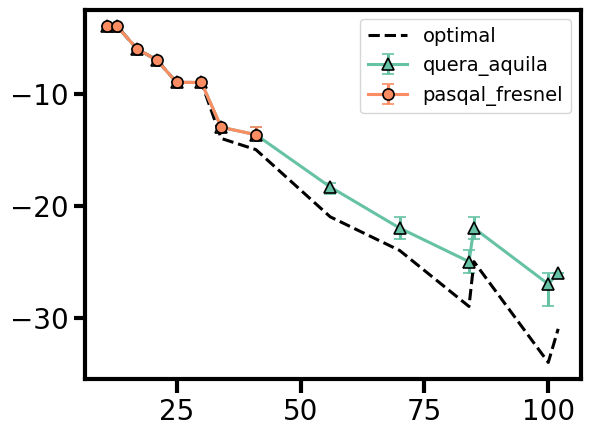

In [38]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
# backend_name = "pasqal_fresnel"
colors= plt.get_cmap("Set2")
method = "QAOA"
case = 1
mitig = False
for ii, backend_name in enumerate(["quera_aquila", "pasqal_fresnel"]):
    nqs = {"quera_aquila":[11,13,17,21,25,30,34,41,56,70,84,85,100,102], "pasqal_fresnel":[11,13,17,21,25,30,34,41]}[backend_name]
    # nqs = [11,13,17,21,25,30,34,41]
    total_cost = []
    opt_cost = []
    for case in [1,2,3]:
        cost = []
        for nq in nqs:
            with open(f"./Data/{backend_name}/{method}/{case}/{nq}.json", "r") as file:
                results = json.load(file)
            cost.append(min([int(i) for i in results[f"greedy_cost" if mitig == True else "cost"].keys()]))
            if case == 1:
                opt_cost.append(results["min_cost"])
        total_cost.append(cost)
        
    total_cost = np.array(total_cost).T
    ax.errorbar(nqs, total_cost.mean(axis=1), [-1*(total_cost.min(axis=1)-total_cost.mean(axis=1)),-1*(total_cost.mean(axis=1)- total_cost.max(axis=1))], capsize=4, marker="o" if backend_name=="pasqal_fresnel" else "^", label=backend_name, color=colors(ii), markeredgecolor="black", markersize=8)
    if backend_name == "quera_aquila":
        ax.plot(nqs, opt_cost, color="black", linestyle="--", label="optimal")
# ax.set_xlabel("Number of qubits")
# ax.set_ylabel("cost")
ax.legend()
fig.savefig(f"./Figures/cost_total.pdf", bbox_inches="tight", transparent=True)

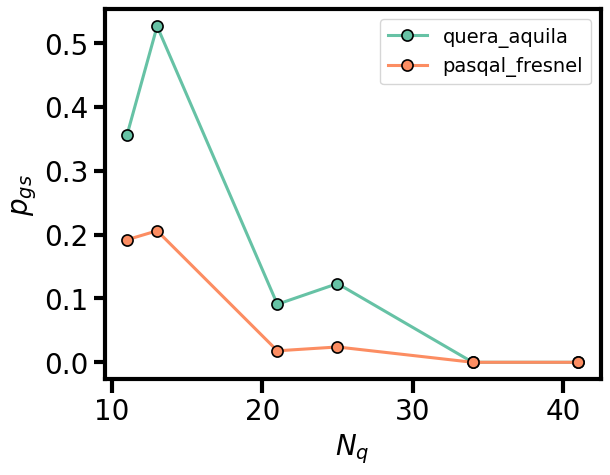

In [63]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
colors= plt.get_cmap("Set2")
backends_list = ["quera_aquila", "pasqal_fresnel"]
nqs = [11,13,21,25,34,41]
total_cost = []
opt_cost = []
backend_probs = {}
for backend_name in backends_list:
    prob = []
    for nq in nqs:
        with open(f"./Data/{backend_name}/{nq}.json", "r") as file:
            results = json.load(file)
        prob.append((results["cost"][str(results["min_cost"])] if str(results["min_cost"]) in results["cost"] else 0)/sum(results["cost"].values()))
    backend_probs[backend_name] = prob
    
# total_cost = np.array(total_cost).T
for ii, backend_name in enumerate(backend_probs):
    ax.plot(nqs, backend_probs[backend_name], label=backend_name, marker="o", color=colors(ii), markeredgecolor="black", markersize=8)
# ax.set_xlabel("Number of qubits")
ax.set_ylabel(r"$p_{gs}$")
ax.set_xlabel(r"$N_q$")
ax.legend()
# fig.savefig(f"./Figures/{backend_name}/cost.pdf", bbox_inches="tight", transparent=True)

{'-4': 86, '-3': 1}
{'-4': 72, '-3': 4}
{'-7': 25, '-6': 41, '-5': 7, '-4': 4}
{'-8': 28, '-9': 41, '-7': 4}
{'-11': 51, '-10': 24, '-12': 44, '-13': 25, '-9': 9, '-8': 1, '-14': 1}
{'-12': 61, '-13': 46, '-11': 37, '-10': 19, '-14': 30, '-9': 3, '-15': 4}
{'-4': 491, '-3': 9}
{'-4': 471, '-3': 29}
{'-7': 198, '-6': 182, '-5': 90, '-4': 30}
{'-9': 259, '-8': 201, '-7': 37, '-6': 3}
{'-13': 101, '-11': 144, '-12': 137, '-10': 71, '-9': 23, '-8': 10, '-14': 14}
{'-13': 111, '-11': 108, '-12': 121, '-15': 16, '-14': 82, '-10': 50, '-9': 12}


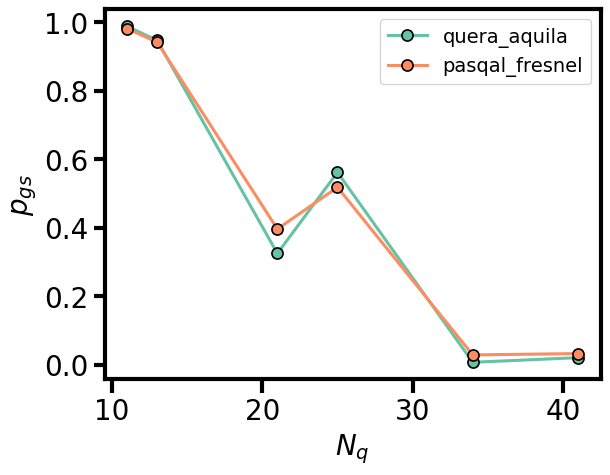

In [62]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
colors= plt.get_cmap("Set2")
backends_list = ["quera_aquila", "pasqal_fresnel"]
nqs = [11,13,21,25,34,41]
total_cost = []
opt_cost = []
backend_probs = {}
for backend_name in backends_list:
    prob = []
    for nq in nqs:
        with open(f"./Data/{backend_name}/{nq}.json", "r") as file:
            results = json.load(file)
        print(results["greedy_cost"])
        prob.append(results["greedy_cost"][str(results["min_cost"])]/sum(results["greedy_cost"].values()))
    backend_probs[backend_name] = prob
    
# total_cost = np.array(total_cost).T
for ii, backend_name in enumerate(backend_probs):
    ax.plot(nqs, backend_probs[backend_name], label=backend_name, marker="o", color=colors(ii), markeredgecolor="black", markersize=8)
# ax.set_xlabel("Number of qubits")
ax.set_ylabel(r"$p_{gs}$")
ax.set_xlabel(r"$N_q$")
ax.legend()
fig.savefig(f"./Figures/pgs_greedy_comparison.pdf", bbox_inches="tight", transparent=True)

11 {'-4': 453, '-3': 12} 465
13 {'-4': 442, '-3': 5} 447
21 {'-6': 133, '-7': 237, '-5': 47, '-4': 11} 428
25 {'-9': 275, '-8': 100, '-7': 22, '-6': 1} 398
34 {'-13': 98, '-12': 115, '-10': 36, '-11': 66, '-14': 14, '-9': 12, '-8': 2} 343
41 {'-15': 45, '-12': 72, '-14': 121, '-13': 113, '-11': 24, '-10': 8, '-9': 1} 384
11 {'-4': 498, '-3': 2} 500
13 {'-4': 492, '-3': 8} 500
21 {'-7': 351, '-6': 116, '-5': 26, '-4': 7} 500
25 {'-9': 378, '-8': 106, '-7': 15, '-6': 1} 500
34 {'-13': 196, '-14': 78, '-12': 139, '-11': 70, '-9': 1, '-10': 15, '-8': 1} 500
41 {'-15': 170, '-14': 180, '-12': 41, '-13': 87, '-11': 20, '-10': 2} 500


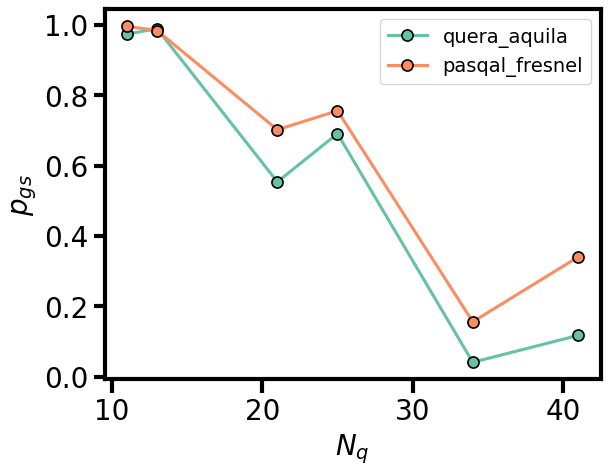

In [5]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
colors= plt.get_cmap("Set2")
backends_list = ["quera_aquila", "pasqal_fresnel"]
nqs = [11,13,21,25,34,41]
total_cost = []
opt_cost = []
backend_probs = {}
case = 2
time = "_t_4e-06"
for backend_name in backends_list:
    prob = []
    for nq in nqs:
        with open(f"./Data/{backend_name}/QAA/{case}/{nq}{time}.json", "r") as file:
            results = json.load(file)
        print(nq, results["greedy_cost"], sum(results["greedy_cost"].values()))
        prob.append(results["greedy_cost"][str(results["min_cost"])]/sum(results["greedy_cost"].values()))
    backend_probs[backend_name] = prob
    
# total_cost = np.array(total_cost).T
for ii, backend_name in enumerate(backend_probs):
    ax.plot(nqs, backend_probs[backend_name], label=backend_name, marker="o", color=colors(ii), markeredgecolor="black", markersize=8)
# ax.set_xlabel("Number of qubits")
ax.set_ylabel(r"$p_{gs}$")
ax.set_xlabel(r"$N_q$")
ax.legend()
# fig.savefig(f"./Figures/pgs_greedy_comparison.pdf", bbox_inches="tight", transparent=True)

{'-4': 468, '-3': 3}
{'-4': 451, '-3': 7}
{'-6': 330, '-4': 23, '-5': 102}
{'-7': 231, '-6': 140, '-5': 41, '-4': 9}
{'-9': 278, '-8': 114, '-7': 8, '-6': 1}
{'-8': 77, '-9': 330, '-7': 6}
{'-11': 75, '-13': 85, '-12': 123, '-14': 20, '-10': 30, '-9': 9, '-8': 1}
{'-13': 140, '-15': 59, '-12': 101, '-14': 140, '-11': 47, '-10': 11, '-9': 2}
{'-20': 82, '-19': 101, '-18': 103, '-17': 55, '-16': 12, '-21': 20, '-15': 3}
{'-24': 56, '-23': 122, '-22': 99, '-20': 15, '-21': 46, '-19': 2, '-18': 1}
{'-26': 84, '-24': 42, '-25': 71, '-27': 43, '-29': 11, '-28': 33, '-23': 12, '-22': 1}
{'-24': 81, '-23': 106, '-20': 3, '-22': 64, '-25': 21, '-21': 28}
{'-32': 56, '-31': 59, '-30': 37, '-29': 18, '-28': 5, '-34': 3, '-33': 16, '-27': 3}
{'-29': 13, '-26': 79, '-25': 41, '-27': 73, '-28': 34, '-30': 4, '-24': 16, '-23': 5}


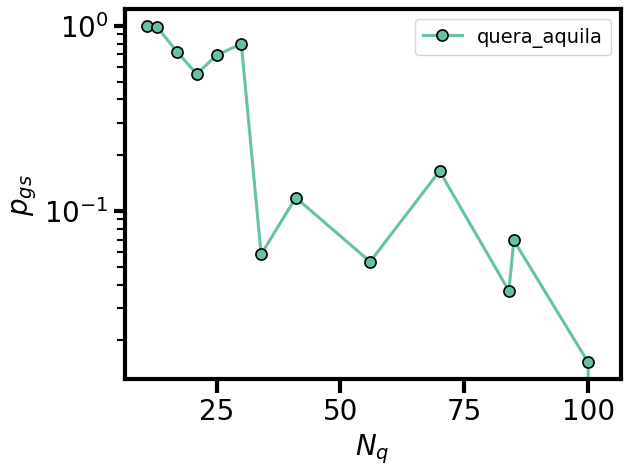

In [104]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
colors= plt.get_cmap("Set2")
backends_list = ["quera_aquila"]
nqs = [11,13,17,21,25,30,34,41,56,70,84,85,100,102]
total_cost = []
opt_cost = []
backend_probs = {}
case = 3
time = "_t_4e-06"
for backend_name in backends_list:
    prob = []
    for nq in nqs:
        with open(f"./Data/{backend_name}/QAA/{case}/{nq}{time}.json", "r") as file:
            results = json.load(file)
        print(results["greedy_cost"])
        prob.append((results["greedy_cost"][str(results["min_cost"])] if str(results["min_cost"]) in results["greedy_cost"] else 0)/sum(results["greedy_cost"].values()))
    backend_probs[backend_name] = prob
    
# total_cost = np.array(total_cost).T
for ii, backend_name in enumerate(backend_probs):
    ax.plot(nqs, backend_probs[backend_name], label=backend_name, marker="o", color=colors(ii), markeredgecolor="black", markersize=8)
# ax.set_xlabel("Number of qubits")
ax.set_ylabel(r"$p_{gs}$")
ax.set_xlabel(r"$N_q$")
ax.legend()
ax.set_yscale("log")
# fig.savefig(f"./Figures/pgs_greedy_comparison.pdf", bbox_inches="tight", transparent=True)

# Approximation ratio



In [7]:
results["samples"].keys()

dict_keys(['00000101001110101110100000001100101000010', '00000101001110101010100000001100101000010', '01000101001000101010100000101100001000010', '01000101001110101010100000101100011000000', '00001101001110101110000000000100001000010', '00000001001111101110100000001000101000010', '00000101001110011110100000001100101000010', '00000101001110101111100000101100001000010', '01000101000110101010100000101100001000010', '00000101001110011010100010000100101000010', '01000111001110101010100000101100001000000', '01000101001110101010100000101100001000010', '11000001001110100010001000101000000000000', '11000001001010100110100000101101001000000', '10111000001000100000100001000001001000000', '10100100001110000010000000000000011001000', '10010111011100100010001100001000001001000', '10010101000000100010000000100001011011000', '10010001001110010110100000001100001000001', '10001100011010100000000000000100011000000', '10001100001110101010100000000110001000010', '10000111001010100110100000001100101000000',

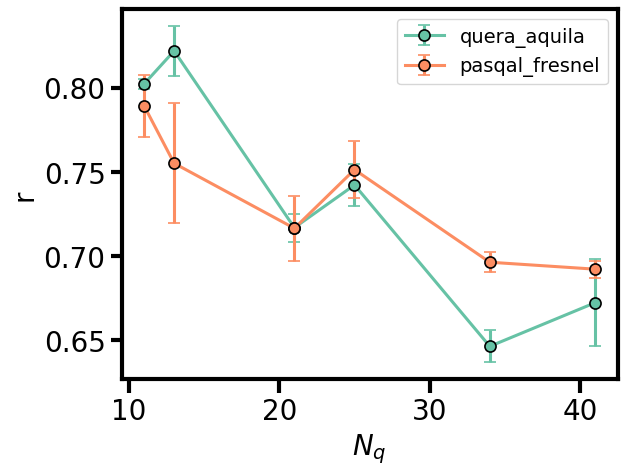

In [38]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
colors= plt.get_cmap("Set2")
backends_list = ["quera_aquila", "pasqal_fresnel"]
nqs = [11,13,21,25,34,41]
total_cost = []
opt_cost = []
backend_probs = {}
method = "QAA"
cases = [1,2,3]
time = "t_4e-06"
for time in [ "t_4e-06"]:
    for backend_name in backends_list:
        prob_list = []
        for case in cases:
            prob = []
            for nq in nqs:
                with open(f"./Data/{backend_name}/{method}/{case}/{nq}_{time}.json", "r") as file:
                    results = json.load(file)
                # print(backend_name, nq, sum(results["cost"].values()))
                prob.append(sum([int(k)*v for k, v in results["cost"].items()])/sum(results["cost"].values())/ results["min_cost"])
            prob_list.append(prob)
        backend_probs[backend_name] = np.array(prob_list)
        
    # total_cost = np.array(total_cost).T
    for ii, backend_name in enumerate(backend_probs):
        ax.errorbar(nqs, backend_probs[backend_name].mean(axis=0), backend_probs[backend_name].std(axis=0), label=backend_name, marker="o", color=colors(ii), markeredgecolor="black", markersize=8, capsize=4)
    # ax.set_xlabel("Number of qubits")
ax.set_ylabel(r"r")
ax.set_xlabel(r"$N_q$")
ax.legend()
fig.savefig(f"./Figures/approx_ratio_comparison.pdf", bbox_inches="tight", transparent=True)

quera_aquila 11 87
quera_aquila 13 76
quera_aquila 21 77
quera_aquila 25 73
quera_aquila 34 155
quera_aquila 41 157
pasqal_fresnel 11 500
pasqal_fresnel 13 500
pasqal_fresnel 21 500
pasqal_fresnel 25 500
pasqal_fresnel 34 500
pasqal_fresnel 41 500


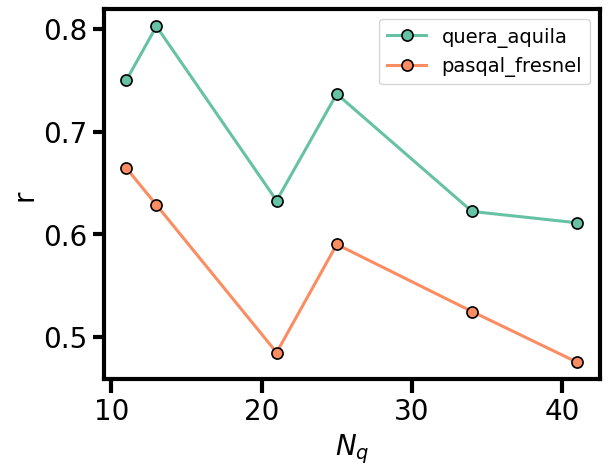

In [37]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
colors= plt.get_cmap("Set2")
backends_list = ["quera_aquila", "pasqal_fresnel"]
nqs = [11,13,21,25,34,41]
total_cost = []
opt_cost = []
backend_probs = {}
method = "QAOA"
case = 3
for backend_name in backends_list:
    prob = []
    for nq in nqs:
        with open(f"./Data/{backend_name}/{method}/{case}/{nq}.json", "r") as file:
            results = json.load(file)
        print(backend_name, nq, sum(results["cost"].values()))
        prob.append(sum([int(k)*v for k, v in results["cost"].items()])/sum(results["cost"].values())/ results["min_cost"])
    backend_probs[backend_name] = prob
    
# total_cost = np.array(total_cost).T
for ii, backend_name in enumerate(backend_probs):
    ax.plot(nqs, backend_probs[backend_name], label=backend_name, marker="o", color=colors(ii), markeredgecolor="black", markersize=8)
# ax.set_xlabel("Number of qubits")
ax.set_ylabel(r"r")
ax.set_xlabel(r"$N_q$")
ax.legend()
# fig.savefig(f"./Figures/{backend_name}/cost.pdf", bbox_inches="tight", transparent=True)

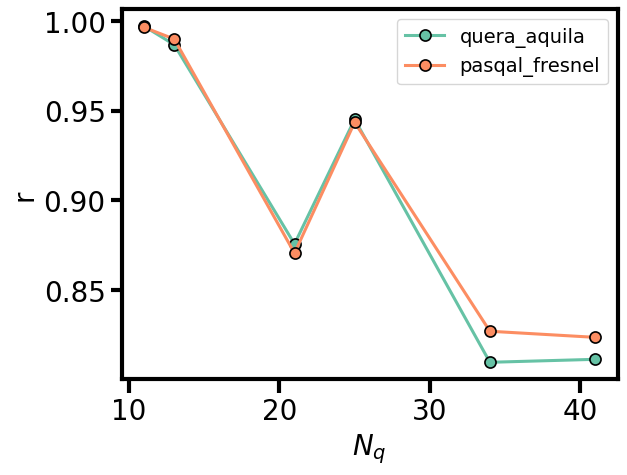

In [ ]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
colors= plt.get_cmap("Set2")
backends_list = ["quera_aquila", "pasqal_fresnel"]
nqs = [11,13,21,25,34,41]
total_cost = []
opt_cost = []
backend_probs = {}
case = 2
for backend_name in backends_list:
    prob = []
    for nq in nqs:
        with open(f"./Data/{backend_name}/QAOA/{case}/{nq}.json", "r") as file:
            results = json.load(file)
        prob.append(sum([int(k)*v for k, v in results["greedy_cost"].items()])/sum(results["greedy_cost"].values())/ results["min_cost"])
    backend_probs[backend_name] = prob
    
# total_cost = np.array(total_cost).T
for ii, backend_name in enumerate(backend_probs):
    ax.plot(nqs, backend_probs[backend_name], label=backend_name, marker="o", color=colors(ii), markeredgecolor="black", markersize=8)
# ax.set_xlabel("Number of qubits")
ax.set_ylabel(r"r")
ax.set_xlabel(r"$N_q$")
ax.legend()
# fig.savefig(f"./Figures/{backend_name}/cost.pdf", bbox_inches="tight", transparent=True)

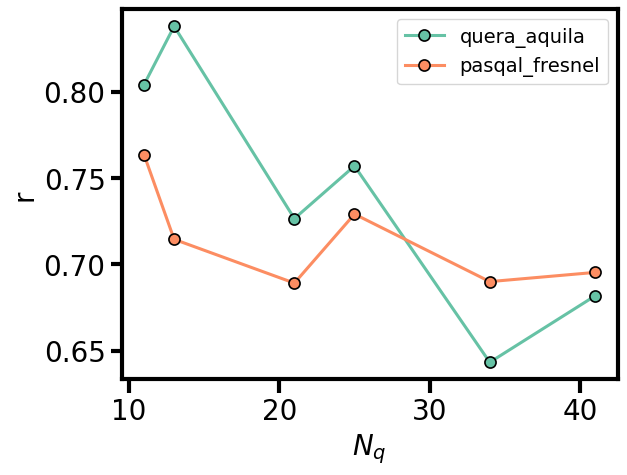

In [47]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
colors= plt.get_cmap("Set2")
backends_list = ["quera_aquila", "pasqal_fresnel"]
nqs = [11,13,21,25,34,41]
total_cost = []
opt_cost = []
backend_probs = {}
case = 2
mitig = False
time = "_t_4e-06"
for backend_name in backends_list:
    prob = []
    for nq in nqs:
        if backend_name == "quera_aquila":
            case = 3
        else:
            case = 2
        with open(f"./Data/{backend_name}/QAA/{case}/{nq}{time}.json", "r") as file:
            results = json.load(file)
        prob.append(sum([int(k)*v for k, v in results["greedy_cost" if mitig == True else "cost"].items()])/sum(results["cost"].values())/ results["min_cost"])
    backend_probs[backend_name] = prob
    
# total_cost = np.array(total_cost).T
for ii, backend_name in enumerate(backend_probs):
    ax.plot(nqs, backend_probs[backend_name], label=backend_name, marker="o", color=colors(ii), markeredgecolor="black", markersize=8)
# ax.set_xlabel("Number of qubits")
ax.set_ylabel(r"r")
ax.set_xlabel(r"$N_q$")
ax.legend()
# fig.savefig(f"./Figures/{backend_name}/cost.pdf", bbox_inches="tight", transparent=True)

quera_aquila 11 87
quera_aquila 13 76
quera_aquila 17 85
quera_aquila 21 77
quera_aquila 25 73
quera_aquila 30 154
quera_aquila 34 155
quera_aquila 41 200
quera_aquila 56 124
quera_aquila 70 115
quera_aquila 84 92
quera_aquila 85 103
quera_aquila 100 39
quera_aquila 102 71


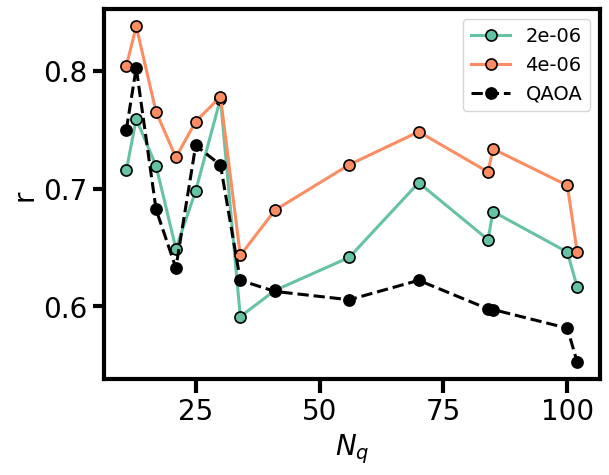

In [69]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
colors= plt.get_cmap("Set2")
backends_list = ["quera_aquila"]
nqs = [11,13,17,21,25,30,34,41,56,70,84,85,100,102]
total_cost = []
opt_cost = []
backend_probs = {}
time = 1e-6
case = 3
for ii, time in enumerate([2e-6, 4e-6]):
    for backend_name in backends_list:
        prob = []
        for nq in nqs:
            with open(f"./Data/{backend_name}/QAA/{case}/{nq}_t_{time}.json", "r") as file:
                results = json.load(file)
            prob.append(sum([int(k)*v for k, v in results["cost"].items()])/sum(results["cost"].values())/ results["min_cost"])
        backend_probs[backend_name] = prob
        
    # total_cost = np.array(total_cost).T
    for jj, backend_name in enumerate(backend_probs):
        ax.plot(nqs, backend_probs[backend_name], label=time, marker="o", color=colors(ii), markeredgecolor="black", markersize=8)
    # ax.set_xlabel("Number of qubits")

backends_list = ["quera_aquila"]
nqs = [11,13,17,21,25,30,34,41,56,70,84,85,100,102]
total_cost = []
opt_cost = []
backend_probs = {}
for backend_name in backends_list:
    prob = []
    for nq in nqs:
        with open(f"./Data/{backend_name}/QAOA/{case}/{nq}.json", "r") as file:
            results = json.load(file)
        print(backend_name, nq, sum(results["cost"].values()))
        prob.append(sum([int(k)*v for k, v in results["cost"].items()])/sum(results["cost"].values())/ results["min_cost"])
    backend_probs[backend_name] = prob
    
# total_cost = np.array(total_cost).T
for jj, backend_name in enumerate(backend_probs):
    ax.plot(nqs, backend_probs[backend_name], label="QAOA", marker="o", linestyle="--", color="black", markeredgecolor="black", markersize=8)
ax.set_ylabel(r"r")
ax.set_xlabel(r"$N_q$")
ax.legend()
# fig.savefig(f"./Figures/{backend_name}/cost.pdf", bbox_inches="tight", transparent=True)

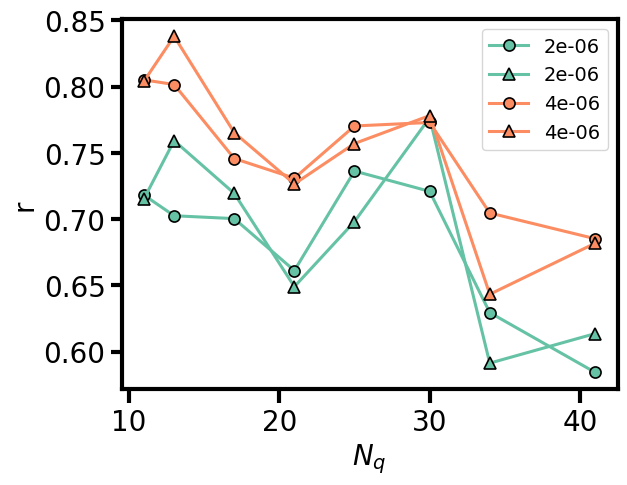

In [29]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
colors= plt.get_cmap("Set2")
backends_list = ["pasqal_fresnel", "quera_aquila"]
nqs = [11,13,17,21,25,30,34,41]#,56,70,84,85,100,102]
total_cost = []
opt_cost = []
backend_probs = {}
time = 1e-6
case = 3
for ii, time in enumerate([2e-6, 4e-6]):
    for backend_name in backends_list:
        prob = []
        for nq in nqs:
            with open(f"./Data/{backend_name}/QAA/{case}/{nq}_t_{time}.json", "r") as file:
                results = json.load(file)
            prob.append(sum([int(k)*v for k, v in results["cost"].items()])/sum(results["cost"].values())/ results["min_cost"])
        backend_probs[backend_name] = prob
        
    # total_cost = np.array(total_cost).T
    for jj, backend_name in enumerate(backend_probs):
        ax.plot(nqs, backend_probs[backend_name], label=time, marker="o" if backend_name=="pasqal_fresnel" else "^", color=colors(ii), markeredgecolor="black", markersize=8)
    # ax.set_xlabel("Number of qubits")

# backends_list = ["quera_aquila"]
# nqs = [11,13,17,21,25,30,34,41,56,70,84,85,100,102]
# total_cost = []
# opt_cost = []
# backend_probs = {}
# for backend_name in backends_list:
#     prob = []
#     for nq in nqs:
#         with open(f"./Data/{backend_name}/QAOA/{case}/{nq}.json", "r") as file:
#             results = json.load(file)
#         print(backend_name, nq, sum(results["cost"].values()))
#         prob.append(sum([int(k)*v for k, v in results["cost"].items()])/sum(results["cost"].values())/ results["min_cost"])
#     backend_probs[backend_name] = prob
    
# total_cost = np.array(total_cost).T
# for jj, backend_name in enumerate(backend_probs):
    # ax.plot(nqs, backend_probs[backend_name], label="QAOA", marker="o", linestyle="--", color="black", markeredgecolor="black", markersize=8)
ax.set_ylabel(r"r")
ax.set_xlabel(r"$N_q$")
ax.legend()
# fig.savefig(f"./Figures/{backend_name}/cost.pdf", bbox_inches="tight", transparent=True)

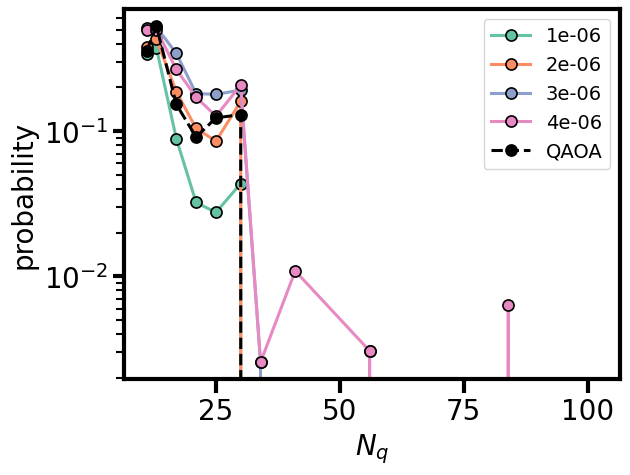

In [37]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
colors= plt.get_cmap("Set2")
backends_list = ["quera_aquila"]
nqs = [11,13,17,21,25,30,34,41,56,70,84,85,100,102]
total_cost = []
opt_cost = []
backend_probs = {}
time = 1e-6
for ii, time in enumerate([1e-6, 2e-6, 3e-6, 4e-6]):
    for backend_name in backends_list:
        prob = []
        for nq in nqs:
            with open(f"./Data/{backend_name}/QA/{nq}_t_{time}.json", "r") as file:
                results = json.load(file)
            prob.append((results["cost"][str(results["min_cost"])] if str(results["min_cost"]) in results["cost"].keys() else 0)/sum(results["cost"].values()))
        backend_probs[backend_name] = prob
        
    # total_cost = np.array(total_cost).T
    for jj, backend_name in enumerate(backend_probs):
        ax.plot(nqs, backend_probs[backend_name], label=time, marker="o", color=colors(ii), markeredgecolor="black", markersize=8)
    # ax.set_xlabel("Number of qubits")

backends_list = ["quera_aquila"]
nqs = [11,13,17,21,25,30,34,41,56,70,84,85,100,102]
total_cost = []
opt_cost = []
backend_probs = {}
for backend_name in backends_list:
    prob = []
    for nq in nqs:
        with open(f"./Data/{backend_name}/QAOA/{nq}.json", "r") as file:
            results = json.load(file)
        prob.append((results["cost"][str(results["min_cost"])] if str(results["min_cost"]) in results["cost"].keys() else 0)/sum(results["cost"].values()))
    backend_probs[backend_name] = prob
    
# total_cost = np.array(total_cost).T
for jj, backend_name in enumerate(backend_probs):
    ax.plot(nqs, backend_probs[backend_name], label="QAOA", marker="o", linestyle="--", color="black", markeredgecolor="black", markersize=8)
ax.set_ylabel(r"probability")
ax.set_xlabel(r"$N_q$")
ax.legend()
ax.set_yscale("log")
# fig.savefig(f"./Figures/{backend_name}/cost.pdf", bbox_inches="tight", transparent=True)

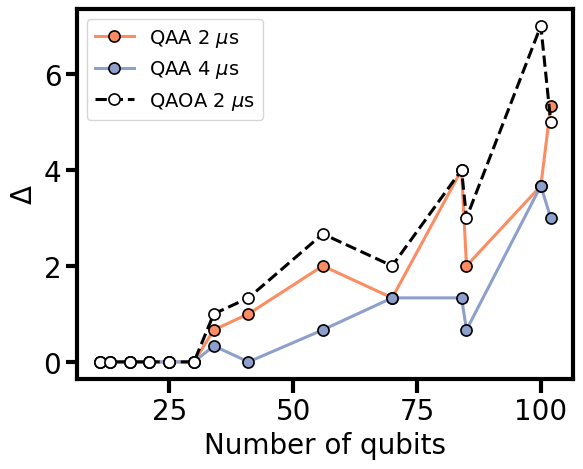

In [62]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
colors= plt.get_cmap("Set2")

nqs = [11,13,17,21,25,30,34,41,56,70,84,85,100,102]
total_cost = []
opt_cost = []
for case in ["1", "2", "3"]:
    cost = []
    for nq in nqs:
        with open(f"./Data/{backend_name}/QAOA/{case}/{nq}.json", "r") as file:
            results = json.load(file)
        cost.append(min([int(i) for i in results["cost"].keys()]))
        if case =="1":
            opt_cost.append(results["min_cost"])
    total_cost.append(cost)
    
total_cost = np.array(total_cost).T
opt_cost = np.array(opt_cost)
# ax.plot(nqs, opt_cost, color="black", linestyle="--", label="optimal")


times= [2e-6,4e-6]
case = 3
for ii, extra in enumerate(times):
    total_cost_qaa = []
    for case in ["1", "2", "3"]:
        cost = []
        for nq in nqs:
            with open(f"./Data/{backend_name}/QAA/{case}/{nq}_t_{extra}.json", "r") as file:
                results = json.load(file)
            cost.append(min([int(i) for i in results["cost"].keys()]))
        total_cost_qaa.append(cost)
    total_cost_qaa = np.array(total_cost_qaa).T
    ax.plot(nqs, total_cost_qaa.mean(axis=1) - opt_cost, marker="o", label="QAA "+str(round(extra*1e6))+r" $\mu$s", color=colors(ii+1), markeredgecolor="black", markersize=8)

ax.plot(nqs, total_cost.mean(axis=1) - opt_cost, marker="o", label=r"QAOA 2 $\mu$s", linestyle="--", color="black", markerfacecolor="white", markeredgecolor="black", markersize=8)

ax.set_xlabel("Number of qubits")
ax.set_ylabel(r"$\Delta$")
ax.legend()
# fig.savefig(f"./Figures/{backend_name}/cost.pdf", bbox_inches="tight", transparent=True)

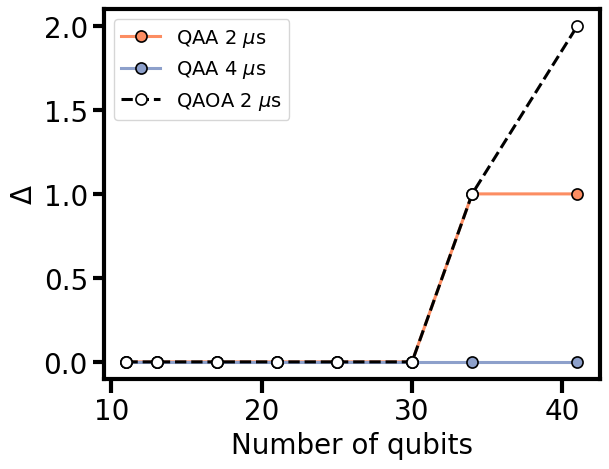

In [63]:
fig, ax = plt.subplots()
backend_name = "pasqal_fresnel"
colors= plt.get_cmap("Set2")

nqs = [11,13,17,21,25,30,34,41]
total_cost = []
opt_cost = []
case = 1
for extra in ["",]:
    cost = []
    for nq in nqs:
        with open(f"./Data/{backend_name}/QAOA/{case}/{nq}{extra}.json", "r") as file:
            results = json.load(file)
        cost.append(min([int(i) for i in results["cost"].keys()]))
        if extra =="":
            opt_cost.append(results["min_cost"])
    total_cost.append(cost)
    
total_cost = np.array(total_cost).T
opt_cost = np.array(opt_cost)
# ax.plot(nqs, opt_cost, color="black", linestyle="--", label="optimal")

case = 1
times= [2e-6,4e-6]
for ii, extra in enumerate(times):
    cost = []
    for nq in nqs:
        with open(f"./Data/{backend_name}/QAA/{case}/{nq}_t_{extra}.json", "r") as file:
            results = json.load(file)
        cost.append(min([int(i) for i in results["cost"].keys()]))
    
    cost = np.array(cost).T
    ax.plot(nqs, cost - opt_cost, marker="o", label="QAA "+str(round(extra*1e6))+r" $\mu$s", color=colors(ii+1), markeredgecolor="black", markersize=8)
ax.plot(nqs, total_cost.mean(axis=1) - opt_cost, marker="o", label=r"QAOA 2 $\mu$s", linestyle="--", color="black", markerfacecolor="white", markeredgecolor="black", markersize=8)

ax.set_xlabel("Number of qubits")
ax.set_ylabel(r"$\Delta$")
ax.legend()
# fig.savefig(f"./Figures/{backend_name}/cost.pdf", bbox_inches="tight", transparent=True)

quera_aquila [11, 13, 17, 21, 25, 30] [0.47849923 0.48451248 0.18844154 0.12464815 0.12389219 0.16827221] [0.08852075 0.0566003  0.04559515 0.03045692 0.00306125 0.03248126]
pasqal_fresnel [11, 13, 17, 21, 25, 30] [0.289 0.233 0.049 0.005 0.026 0.014] [0.005 0.025 0.009 0.003 0.006 0.01 ]


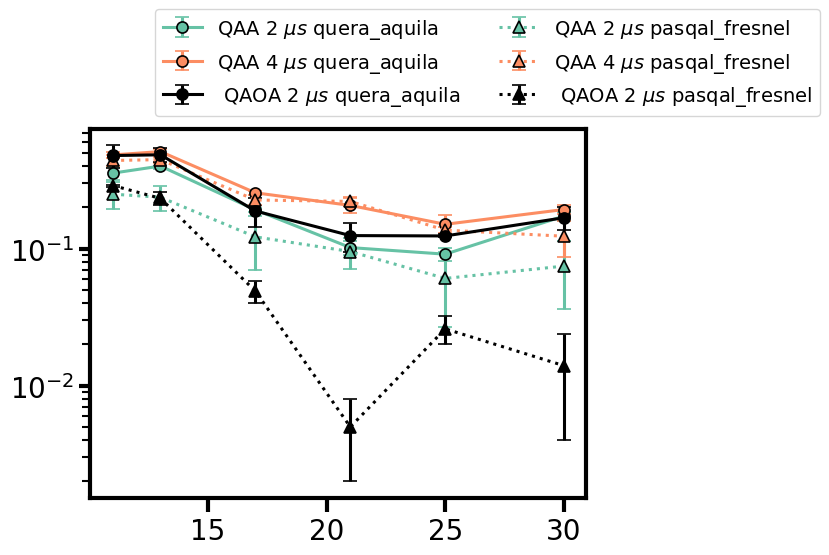

In [3]:
fig, ax = plt.subplots()
backend_name = "pasqal_fresnel"
colors= plt.get_cmap("Set2")
backends_list = ["quera_aquila", "pasqal_fresnel"]
nqs = [11,13,17,21,25,30]
total_cost = []
opt_cost = []
backend_probs = {}
backned_nqs = {}
time = 1e-6
case = 1
for ii, time in enumerate([2e-6, 4e-6]):
    for backend_name in backends_list:
        prob_list = []
        for case in [1,2,3]:
            prob = []
            nqs_used = []
            for nq in nqs:
                with open(f"./Data/{backend_name}/QAA/{case}/{nq}_t_{time}.json", "r") as file:
                    results = json.load(file)
                if str(results["min_cost"]) in results["cost"].keys():
                    prob.append(results["cost"][str(results["min_cost"])]/sum(results["cost"].values()))
                    nqs_used.append(nq)
            prob_list.append(prob)
        backend_probs[backend_name] = np.array(prob_list)
        backned_nqs[backend_name] = nqs_used
        
    # total_cost = np.array(total_cost).T
    for jj, backend_name in enumerate(backend_probs):
        ax.errorbar(backned_nqs[backend_name], backend_probs[backend_name].mean(axis=0), backend_probs[backend_name].std(axis=0), label="QAA " + str(round(time*1e6)) + r" $\mu s$ "+backend_name, marker="o" if backend_name=="quera_aquila" else "^", color=colors(ii), markeredgecolor="black", markersize=8, linestyle="-" if backend_name=="quera_aquila" else ":")
    # ax.set_xlabel("Number of qubits")

backends_list = ["quera_aquila", "pasqal_fresnel"]
nqs = [11,13,17,21,25,30,34,41,56,70,84,85]
total_cost = []
opt_cost = []
backend_probs = {}

for backend_name in backends_list:
    prob_list = []
    for case in [1,2,3] if backend_name=="quera_aquila" else [2,3]:
        prob = []
        nqs_used = []
        for nq in nqs:
            with open(f"./Data/{backend_name}/QAOA/{case}/{nq}.json", "r") as file:
                results = json.load(file)
            if str(results["min_cost"]) in results["cost"].keys():
                prob.append(results["cost"][str(results["min_cost"])]/sum(results["cost"].values()))
                nqs_used.append(nq)
        prob_list.append(prob)
    backned_nqs[backend_name] = nqs_used
    backend_probs[backend_name] = np.array(prob_list)

    
# total_cost = np.array(total_cost).T
for jj, backend_name in enumerate(backend_probs):
    ax.errorbar(backned_nqs[backend_name], backend_probs[backend_name].mean(axis=0), backend_probs[backend_name].std(axis=0), label=r" QAOA 2 $\mu s$" +f" {backend_name}", marker="o" if backend_name=="quera_aquila" else "^", linestyle="-" if backend_name=="quera_aquila" else ":", color="black", markeredgecolor="black", markersize=8)
    print(backend_name, backned_nqs[backend_name], backend_probs[backend_name].mean(axis=0), backend_probs[backend_name].std(axis=0))

# Get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Reorder them manually (for example: Third, First, Second)
order = [0,2,4,1,3,5]

# ax.set_ylabel(r"probability")
# ax.set_xlabel(r"$N_q$")
ax.legend([handles[i] for i in order], [labels[i] for i in order], loc="upper center", bbox_to_anchor=(0.8,1.35), ncol=2)
ax.set_yscale("log")
fig.savefig(f"./Figures/probability_summary.pdf", bbox_inches="tight", transparent=True)

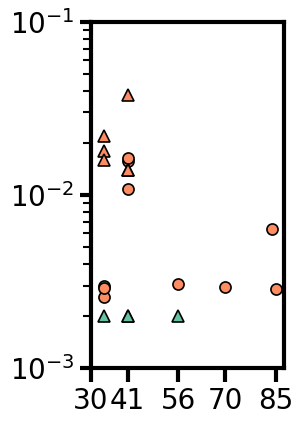

In [86]:
fig, ax = plt.subplots(figsize=(2.5,4.5))
backend_name = "pasqal_fresnel"
colors= plt.get_cmap("Set2")
backends_list = ["quera_aquila", "pasqal_fresnel"]
nqs = [34, 41,56,70,84,85]
total_cost = []
opt_cost = []
backend_probs = {}
backned_nqs = {}
time = 1e-6
case = 1
for ii, time in enumerate([2e-6, 4e-6]):
    for backend_name in backends_list:
        prob_list = []
        for case in [1,2,3]:
            prob = []
            nqs_used = []
            for nq in nqs:
                with open(f"./Data/{backend_name}/QAA/{case}/{nq}_t_{time}.json", "r") as file:
                    results = json.load(file)
                if str(results["min_cost"]) in results["cost"].keys():
                    prob.append(results["cost"][str(results["min_cost"])]/sum(results["cost"].values()))
                    nqs_used.append(nq)
            ax.plot(nqs_used, prob, marker="o" if backend_name=="quera_aquila" else "^", linewidth=0, color=colors(ii), markeredgecolor="black", markersize=8)


ax.set_yscale("log")
ax.set_yticks([0.1,0.01,0.001])
ax.set_xticks([30, 41,56,70,85])
fig.savefig(f"./Figures/probability_summary_large.pdf", bbox_inches="tight", transparent=True)

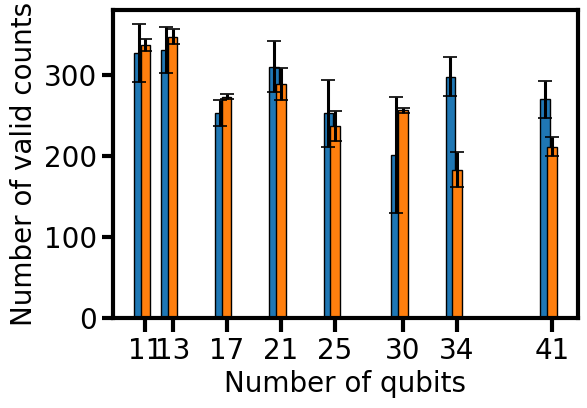

In [56]:
nq = 13
backends = ["pasqal_fresnel","quera_aquila"]
label = {"pasqal_fresnel":"pasqal_fresnel","quera_aquila":"quera_aquila"}

backend_name = "quera_aquila"
method = "QAA"
case = 1
extra = "_t_4e-06"
nqs = [11,13,17,21,25,30,34,41]
fig, ax = plt.subplots(figsize=(6,4))
cases = [1,2,3]
for i, backend_name in enumerate(backends):
    valid_cases = []
    for case in cases:
        valid_counts = []
        for nq in nqs:
            with open(f"./Data/{backend_name}/{method}/{case}/{nq}{extra}.json", "r") as file:
                result = json.load(file)
            valid_counts.append(result["valid"])
        valid_cases.append(valid_counts)
    valid_cases = np.array(valid_cases)
    ax.bar(np.array(nqs)+0.5*i-0.5, valid_cases.mean(axis=0), yerr= valid_cases.std(axis=0), color=colors(i), edgecolor="black", width=0.7, label=label[backend_name])
ax.set_xlabel("Number of qubits")
ax.set_ylabel("Number of valid counts")
ax.set_xticks(nqs)
# ax.legend()

pasqal_fresnel [0.632 0.657 0.515 0.619 0.493 0.417 0.593 0.53  0.109 0.078 0.043 0.046]
quera_aquila [0.669 0.685 0.551 0.55  0.452 0.508 0.335 0.424 0.357 0.265 0.17  0.221]


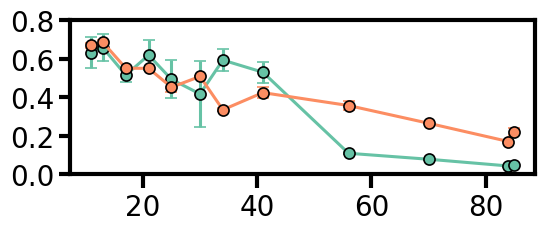

In [21]:
nq = 13
backends = ["pasqal_fresnel","quera_aquila"]
label = {"pasqal_fresnel":"pasqal_fresnel","quera_aquila":"quera_aquila"}
colors = plt.get_cmap("Set2")
backend_name = "quera_aquila"
method = "QAA"
case = 1
extra = "_t_4e-06"
nqs = [11,13,17,21,25,30,34,41,56,70,84,85]
fig, ax = plt.subplots(figsize=(6,2))
cases = [2,3]
for i, backend_name in enumerate(backends):
    valid_cases = []
    for case in cases:
        valid_counts = []
        for nq in nqs:
            with open(f"./Data/{backend_name}/{method}/{case}/{nq}{extra}.json", "r") as file:
                result = json.load(file)
            valid_counts.append(result["valid"])
        valid_cases.append(valid_counts)
    valid_cases = np.array(valid_cases)
    print(backend_name, valid_cases.mean(axis=0)/500)

    ax.errorbar(np.array(nqs), valid_cases.mean(axis=0)/500, yerr= valid_cases.std(axis=0)/500, color=colors(i), label=label[backend_name], marker="o", markersize=8, markeredgecolor="black", capsize=4)
# ax.set_xlabel("Number of qubits")
# ax.set_ylabel("Number of valid counts")
ax.set_yticks([0.0,0.2,0.4,0.6,0.8])
# ax.legend()
fig.savefig(f"./Figures/valid_counts_comparison.pdf", bbox_inches="tight", transparent=True)

pasqal_fresnel [0.90661639 0.90817732 0.87004419 0.86411015 0.86908355 0.88284863
 0.79906498 0.80917847 0.73722768 0.78774671 0.7297318  0.76815385]
quera_aquila [0.90082958 0.91007996 0.87264822 0.85088987 0.86340611 0.88188976
 0.76412958 0.79591639 0.80453754 0.83443101 0.79620613 0.82014006]


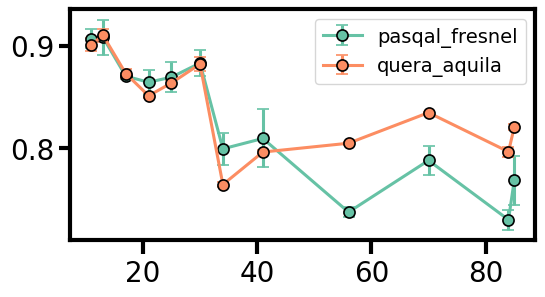

In [18]:
nq = 13
backends = ["pasqal_fresnel","quera_aquila"]
label = {"pasqal_fresnel":"pasqal_fresnel","quera_aquila":"quera_aquila"}

backend_name = "quera_aquila"
method = "QAA"
case = 1
extra = "_t_4e-06"
nqs = [11,13,17,21,25,30,34,41,56,70,84,85]
fig, ax = plt.subplots(figsize=(6,3))
cases = [2,3]
for i, backend_name in enumerate(backends):
    valid_cases = []
    for case in cases:
        valid_counts = []
        for nq in nqs:
            with open(f"./Data/{backend_name}/{method}/{case}/{nq}{extra}.json", "r") as file:
                result = json.load(file)
            valid_counts.append(sum([int(c)*v for c,v in result["cost_valid"].items()])/(sum(result["cost_valid"].values())*result["min_cost"]))
        valid_cases.append(valid_counts)
    valid_cases = np.array(valid_cases)
    print(backend_name, valid_cases.mean(axis=0))
    ax.errorbar(np.array(nqs), valid_cases.mean(axis=0), yerr= valid_cases.std(axis=0), color=colors(i), label=label[backend_name], marker="o", markersize=8, markeredgecolor="black", capsize=4)
# ax.set_xlabel("Number of qubits")
# ax.set_ylabel("Number of valid counts")
# ax.set_xticks(nqs)
ax.legend()
fig.savefig(f"./Figures/approx_ratio_valid_counts_comparison.pdf", bbox_inches="tight", transparent=True)

In [61]:
result["cost_valid"]

{'-4': 240, '-3': 94, '-2': 13}